In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output

In [52]:
data=pd.read_csv("Train.csv")

#  ENCRYPTING CC NUMBER


In [53]:
from ff3 import FF3Cipher
import hashlib
# Encryption parameters
key = "2DE79D232DF5585D68CE47882AE256D6"
def hash_tweak(ccn):
    ccn_str = str(ccn)
    ccn_bytes = ccn_str.encode('utf-8')
    tweak = hashlib.sha256(ccn_bytes[:6] + ccn_bytes[-4:]).digest()[:8]
    tweak_hex = tweak.hex()
    return tweak_hex
def encrypt_cc_num(ccn):
    tweak=hash_tweak(ccn)
    c = FF3Cipher(key, tweak)
    plaintext_str = str(ccn) # Convert to string
    ciphertext = c.encrypt(plaintext_str)
    return ciphertext

# Apply encryption to cc_num column
data["cc_num"] = data["cc_num"].apply(encrypt_cc_num)


#  ENCRYPTING LATITUDES AND LONGITUDES

In [54]:
import geohash2

# Function to encode latitude and longitude into geohash
def encode_geohash(latitude, longitude, precision):
    return geohash2.encode(latitude, longitude, precision)


# Define the precision
precision = 9
# Apply the encode_geohash function on latitude and longitude columns
data['cust_locn'] = data.apply(lambda row: encode_geohash(row['lat'], row['long'], precision), axis=1)
data['merchant_locn']=data.apply(lambda row: encode_geohash(row['merch_lat'], row['merch_long'], precision), axis=1)

# ENCRYPTING OF MERCHANT

In [55]:
from pyfpe_ff3 import FF3Cipher

# Encryption parameters
key = "2DE79D232DF5585D68CE47882AE256D6"
tweak = "A8E7920AFA330A73"
c = FF3Cipher(key, tweak, radix=62)

def encrypt_merchant(plaintext):
    plaintext_str = str(plaintext)
    final_text = ""
    for char in plaintext_str:
        if char.isalnum() or char in "'-":
            final_text += char
    ciphertext = c.encrypt(final_text)
    return ciphertext

# Assuming your DataFrame is named 'df' and the merchant name column is 'Merchant Name'
data["merchant"] = data["merchant"].apply(encrypt_merchant)

data["merchant"].value_counts()

3Iw9PGlLV1OgOAx                    4403
0MkrNLRSm2wCQ2f                    3649
4YdGK75xwAlf3v                     3634
BMIsoA1cRLNP                       3510
3xPK70yXcg9Ae                      3493
                                   ... 
vNCxVSrhNqWpk3MsdNRPRAh2CtqlC7      775
I2goLhKdOqz0SfZ0R                   775
cifFJysXasPHMzTeGWY92IrmrF73f6d     759
B0XGWSgMbsBcqWupXlYqpq              753
KWZGXoDSogU2WMZ8QKUejp5Vpl90j       727
Name: merchant, Length: 693, dtype: int64

In [56]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,cust_locn,merchant_locn
0,0,2019-01-01 00:00:18,7264641988814192,pmH2FaypUs6322tajuKyq,misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,dnqm0xzyj,dnmsugwhz
1,1,2019-01-01 00:00:44,3972811764589960,gCz35VQyFwiZiI2mvIlQ2T3AHu,grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,c2eyn5c8p,c2ezwt5hp
2,2,2019-01-01 00:00:51,7880460321254421,fxBp4Q0tlfwrLg8BpxG,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,9x2pvqv2c,9x8jrz7e5
3,3,2019-01-01 00:01:16,6696832143137150,fxQNiknsN2JH9hf8vYjdBfBN1tKbC,gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,c80r0b10z,c2rgwd7db
4,4,2019-01-01 00:03:06,0923148798306203,s1xJmqwxeXq1OFwyKs,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,dnz6xf2bu,dqbh48td4


In [57]:
data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,cust_locn,merchant_locn
1296670,1296670,2020-06-21 12:12:08,6952213599172164,pMndbB2jchWNy3Y,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,9w8n8d20r,9w89d6trb
1296671,1296671,2020-06-21 12:12:19,2919653030472571,2fMiYIU0OVu6WI2p5JmZV,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,dqbzkhqc5,dqbm76y95
1296672,1296672,2020-06-21 12:12:32,0821914725617590,KPSp1TzAHIevu2Y7mt,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,9tug2h3p0,9tvpr8nrc
1296673,1296673,2020-06-21 12:13:36,2276077112824788,MS6eYKPE9gD33RiNoifn3y3AlL5njF,food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,9xxnds5g5,9xwe6tqpd
1296674,1296674,2020-06-21 12:13:37,7065701141283208,uyuOOjBPIkRz5J261zeBC3RF4PhqAi,food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0,c2phb9wbs,c2qbcth4w


In [58]:
data.shape

(1296675, 25)

In [59]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'cust_locn', 'merchant_locn'],
      dtype='object')

In [60]:
data.duplicated().sum()

0

In [61]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
cust_locn                0
merchant_locn            0
dtype: int64

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  object 
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [63]:
data.describe()

,Unnamed: 0,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [64]:
data.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
cust_locn                    970
merchant_locn            1296671
dtype: int64

In [65]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['trans_date_trans_time'].head(3)

0   2019-01-01 00:00:18
1   2019-01-01 00:00:44
2   2019-01-01 00:00:51
Name: trans_date_trans_time, dtype: datetime64[ns]

In [66]:
#selecting categorical columns , and to check their cardinality
cat_cols = data.select_dtypes(include = 'object').columns # selecting the categorical columns

for col in cat_cols:

    data[col] = data[col].str.lower().str.strip() # cleaning the categorical columns with strings methods

data[cat_cols].nunique().sort_values()

gender                 2
category              14
state                 51
first                352
last                 481
job                  494
merchant             693
city                 894
dob                  968
cust_locn            970
cc_num               983
street               983
merchant_locn    1296671
trans_num        1296675
dtype: int64

# COUNT AND DISTRIBUTION OF CLASSES 

,count,distribution
genuine,1289169,99.421135
fraud,7506,0.578865


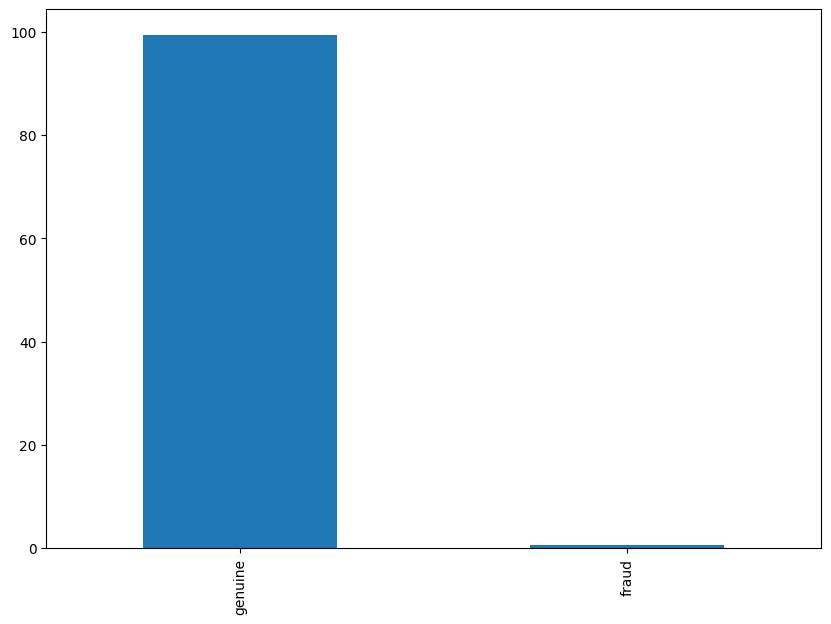

In [67]:
a = data['is_fraud'].value_counts().rename('count') # count of classes
b = (data['is_fraud'].value_counts(normalize = True)*100).rename('distribution') # normalisation of the classes
tem = pd.concat([a,b], axis = 1)
tem.index = ['genuine','fraud']
tem['distribution'].plot(kind = 'bar', figsize = [10,7]);
tem

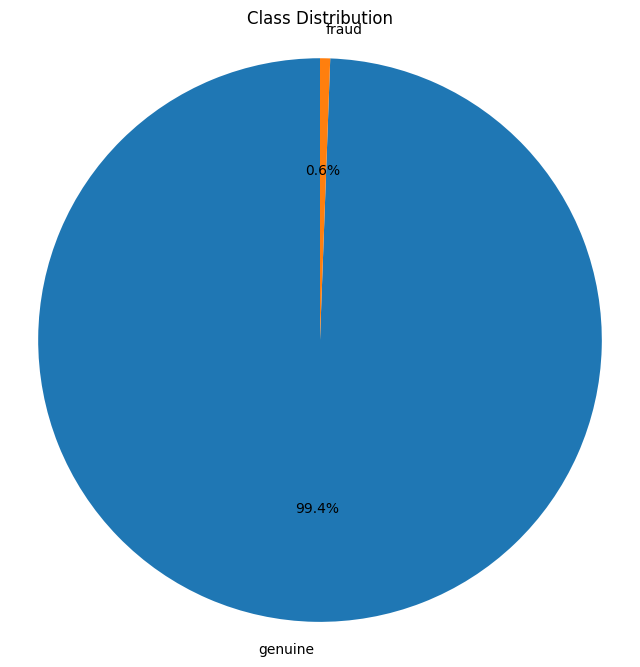

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

a = data['is_fraud'].value_counts().rename('count')  # count of classes
b = (data['is_fraud'].value_counts(normalize=True) * 100).rename('distribution')  # normalization of the classes
tem = pd.concat([a, b], axis=1)
tem.index = ['genuine', 'fraud']

# Create a pie chart
plt.figure(figsize=[8, 8])
plt.pie(tem['distribution'], labels=tem.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Class Distribution')

plt.show()


# INFERENCE


 From the plot, we can observe that the dataset is highly imbalanced, with a vast majority of transactions being 
 non-fraudulent (class 0) and a relatively small number of transactions being fraudulent (class 1).
 This indicates that the dataset has a class imbalance problem, which may affect the performance of a model trained on 
 this dataset. It may be necessary to use techniques such as oversampling, undersampling, or class weighting to handle
 the class imbalance problem when building a model for fraud detection. 

# FEATURE EXTRACTION FROM TRANS_DATE_TRANS_TIME

In [69]:
# extracting transaction hour column

data['trans_hour'] = data['trans_date_trans_time'].dt.hour  # extracting the hour component using the dt accessor

data['trans_hour'].unique() 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [70]:
# extract transaction month column

data['trans_month'] = data['trans_date_trans_time'].dt.month # extracting the month number component using the dt accessor

data['trans_month'].unique() 

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [71]:
# the extract the boolean if the date of transaction is weekend or not

data['trans_day_of_week'] = data['trans_date_trans_time'].dt.dayofweek # extracting the day name component using the dt accessor

data['trans_day_of_week'].unique() 

# Create 'Weekday' and 'Weekend' columns
data['Weekday'] = (data['trans_day_of_week'] < 5).astype(int)
data['Weekend'] = (data['trans_day_of_week'] >= 5).astype(int)

In [72]:
data['trans_year'] = data['trans_date_trans_time'].dt.year

data['trans_year'].unique() # printing the unique values in the extracted series

array([2019, 2020], dtype=int64)

# FEATURES FROM UNIX_TIME

In [73]:
# grouping data according to cc_numbers to derive time between their previous and next transactions

data.groupby(['cc_num'])['cc_num'].count().sort_values(ascending = False).describe().astype(int)

count     983
mean     1319
std       812
min         7
25%       525
50%      1054
75%      2025
max      3123
Name: cc_num, dtype: int32

In [74]:
# sort the dataframe on transaction datetime & cc_num

data.sort_values(by = ['cc_num','unix_time'], ascending = True, inplace = True)

In [75]:
# unix_time for the previouse transaction using the shift method in pandas

data['unix_time_prev_trans'] = data.groupby(by = ['cc_num'])['unix_time'].shift(1)

In [76]:
# For the first transactions-records all the credit cards, the previouse unit time will be null

data['unix_time_prev_trans'].fillna(data['unix_time'] - 86400, inplace = True)

In [77]:
# calculatig the time delay between the previouse and current transaction 
# converting the variable into to mins

data['timedelta_last_trans'] = (data['unix_time'] - data['unix_time_prev_trans'])//60

In [78]:
data.corr()

,Unnamed: 0,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_month,trans_day_of_week,Weekday,Weekend,trans_year,unix_time_prev_trans,timedelta_last_trans
Unnamed: 0,1.000000,-0.000251,0.000709,0.000602,-0.000676,-0.001678,0.998971,0.000541,-0.000671,-0.004767,0.001073,0.181956,-0.030910,0.025749,-0.025749,0.783311,0.998960,-0.032617
amt,-0.000251,1.000000,0.001843,-0.001926,-0.000187,0.005818,-0.000293,-0.001873,-0.000151,0.219404,-0.022811,-0.001748,-0.001001,0.002054,-0.002054,0.000842,-0.000281,-0.003174
zip,0.000709,0.001843,1.000000,-0.114290,-0.909732,0.078467,0.000670,-0.113561,-0.908924,-0.002162,0.005938,0.000852,-0.001353,0.001506,-0.001506,0.000086,0.000688,-0.004815
lat,0.000602,-0.001926,-0.114290,1.000000,-0.015533,-0.155730,0.000632,0.993592,-0.015509,0.001894,-0.011508,-0.001072,0.000498,0.000022,-0.000022,0.001274,0.000602,0.008056
long,-0.000676,-0.000187,-0.909732,-0.015533,1.000000,-0.052715,-0.000642,-0.015452,0.999120,0.001721,-0.002290,-0.001213,0.001593,-0.001956,0.001956,0.000191,-0.000648,0.001658
city_pop,-0.001678,0.005818,0.078467,-0.155730,-0.052715,1.000000,-0.001714,-0.154781,-0.052687,0.002136,0.020381,0.000137,0.002439,-0.005944,0.005944,-0.001673,-0.001722,0.002356
unix_time,0.998971,-0.000293,0.000670,0.000632,-0.000642,-0.001714,1.000000,0.000561,-0.000635,-0.005078,0.000756,0.184868,-0.029284,0.024673,-0.024673,0.782582,0.999993,-0.033771
merch_lat,0.000541,-0.001873,-0.113561,0.993592,-0.015452,-0.154781,0.000561,1.000000,-0.015431,0.001741,-0.011378,-0.001116,0.000263,0.000210,-0.000210,0.001244,0.000531,0.008070
merch_long,-0.000671,-0.000151,-0.908924,-0.015509,0.999120,-0.052687,-0.000635,-0.015431,1.000000,0.001721,-0.002325,-0.001197,0.001553,-0.001918,0.001918,0.000184,-0.000641,0.001642
is_fraud,-0.004767,0.219404,-0.002162,0.001894,0.001721,0.002136,-0.005078,0.001741,0.001721,1.000000,0.013799,-0.012409,0.001739,0.003644,-0.003644,0.003004,-0.005014,-0.017024


# BOX PLOT FOR NUMERIC COLUMNS 

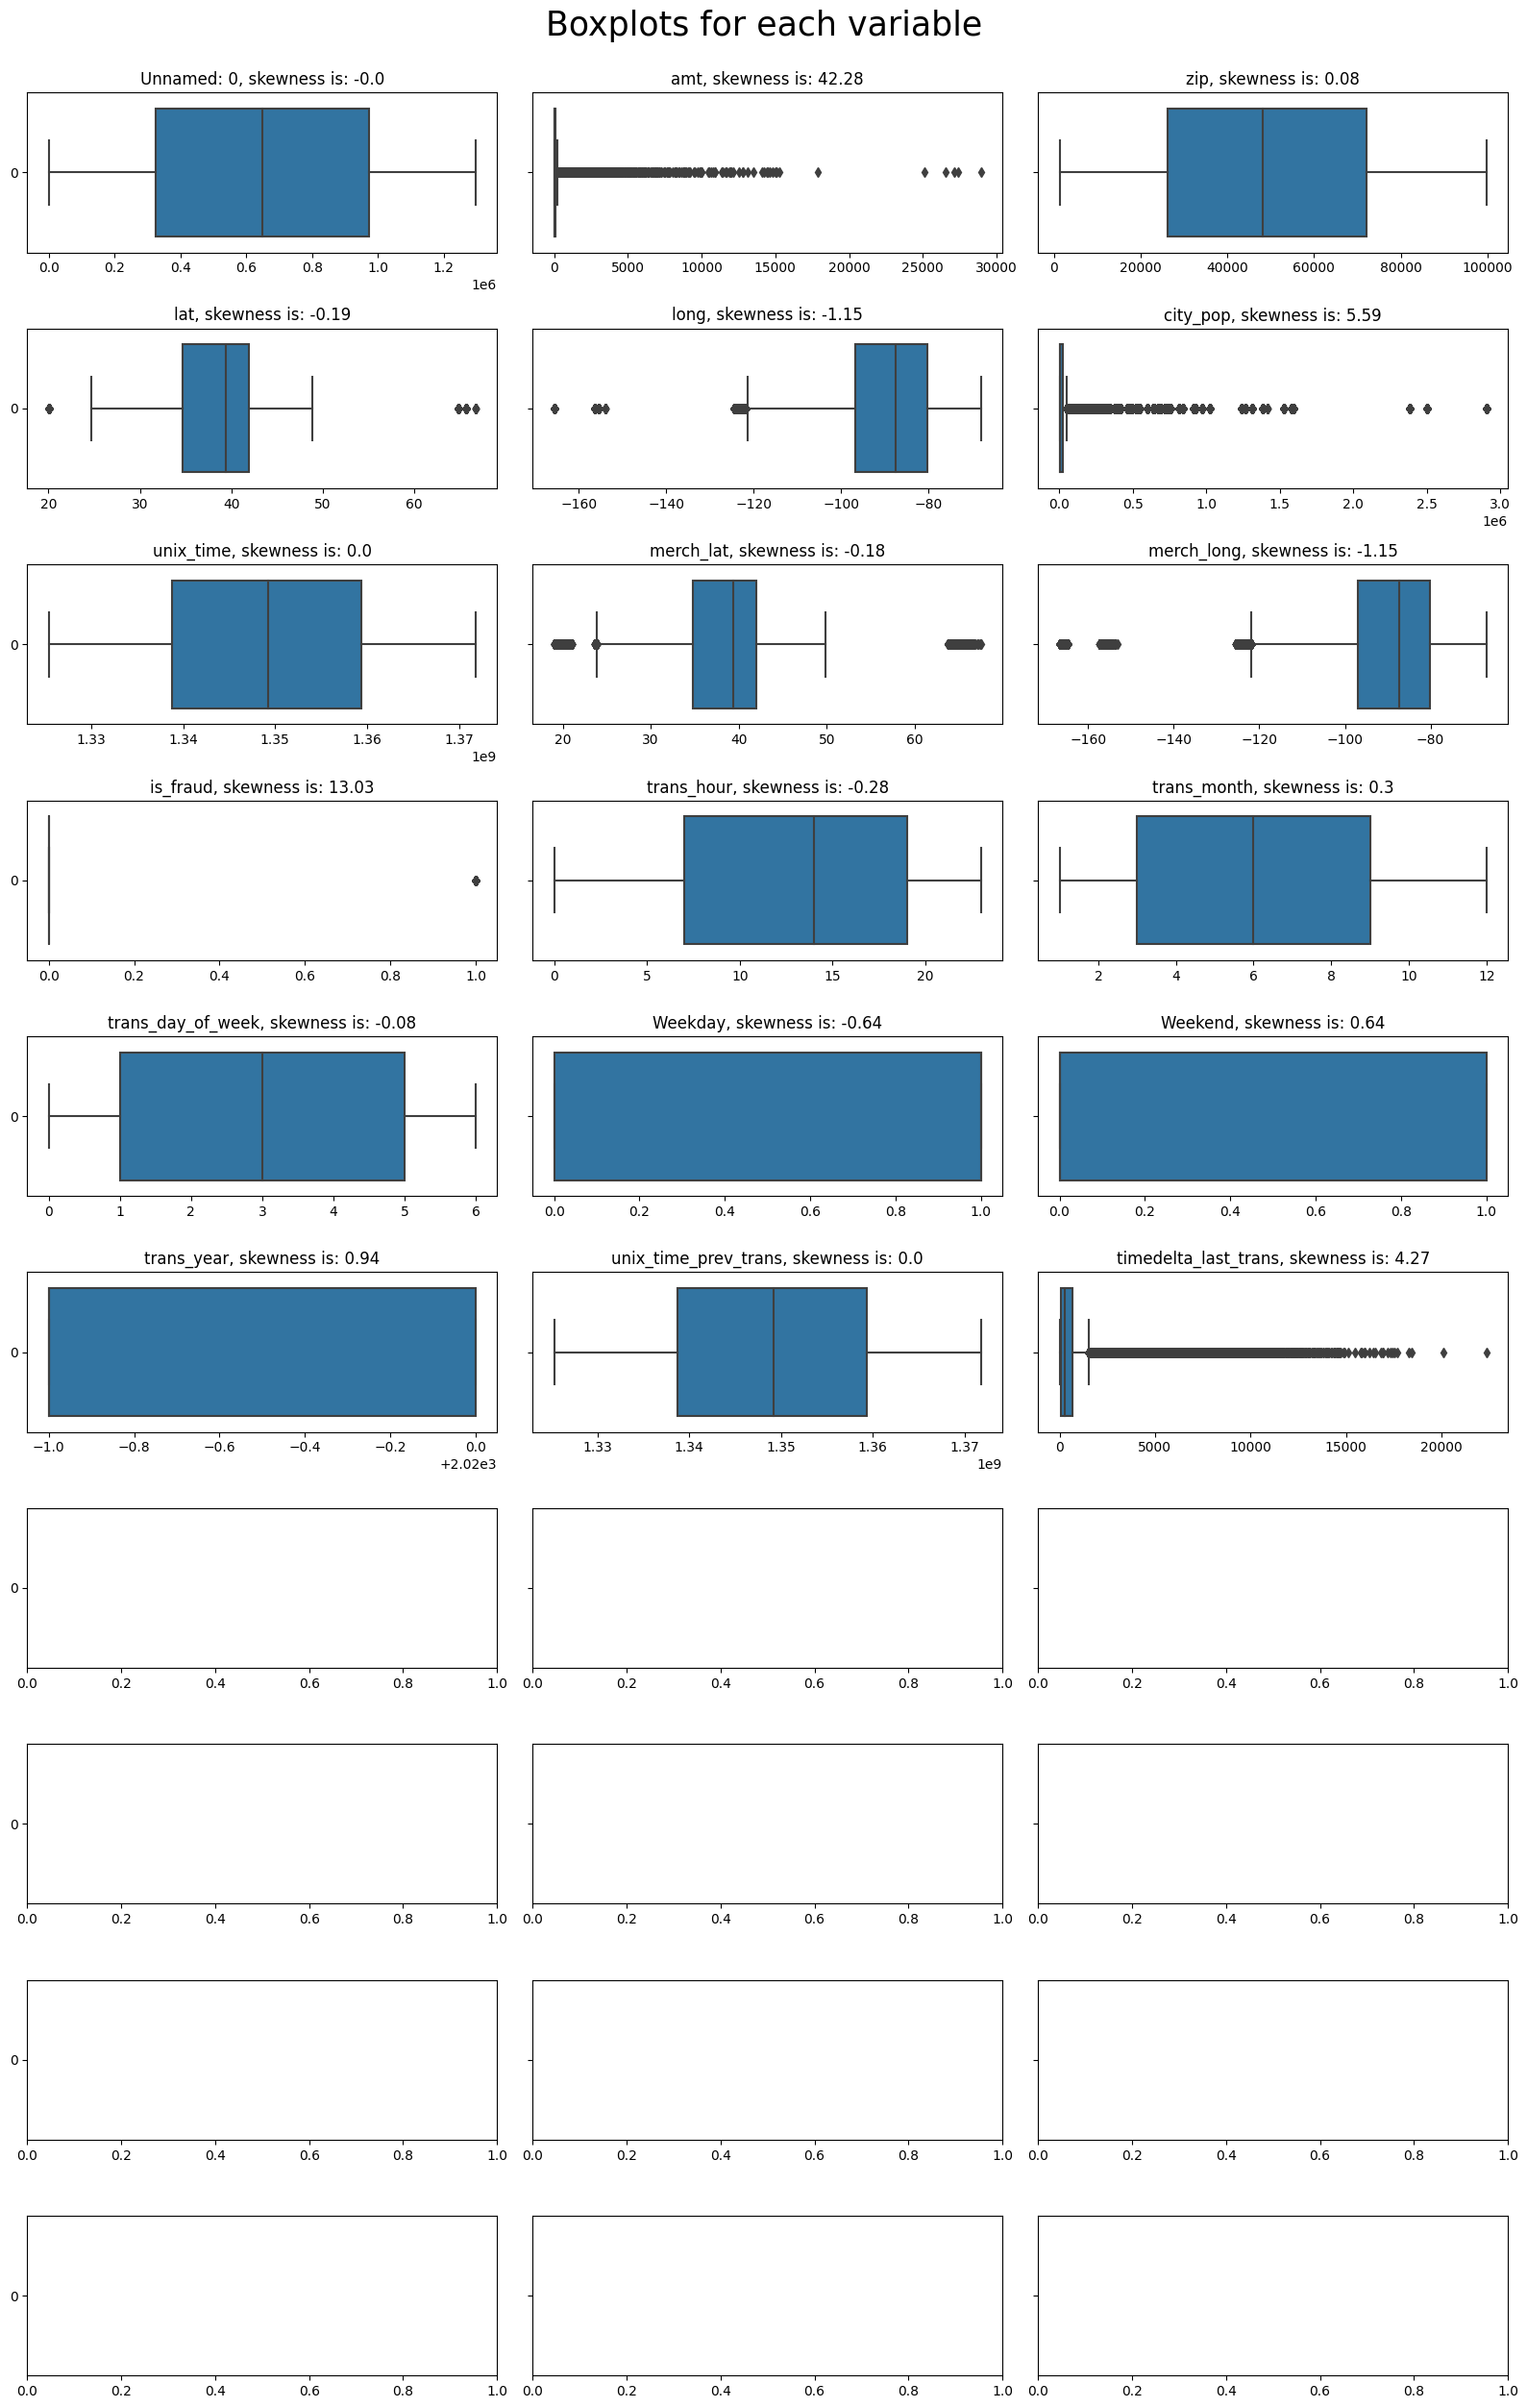

In [79]:
# checking boxplots
numeric_columns = data.select_dtypes(include='number').columns


def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=data, columns_list=numeric_columns, rows=10, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

#  HEATMAP 

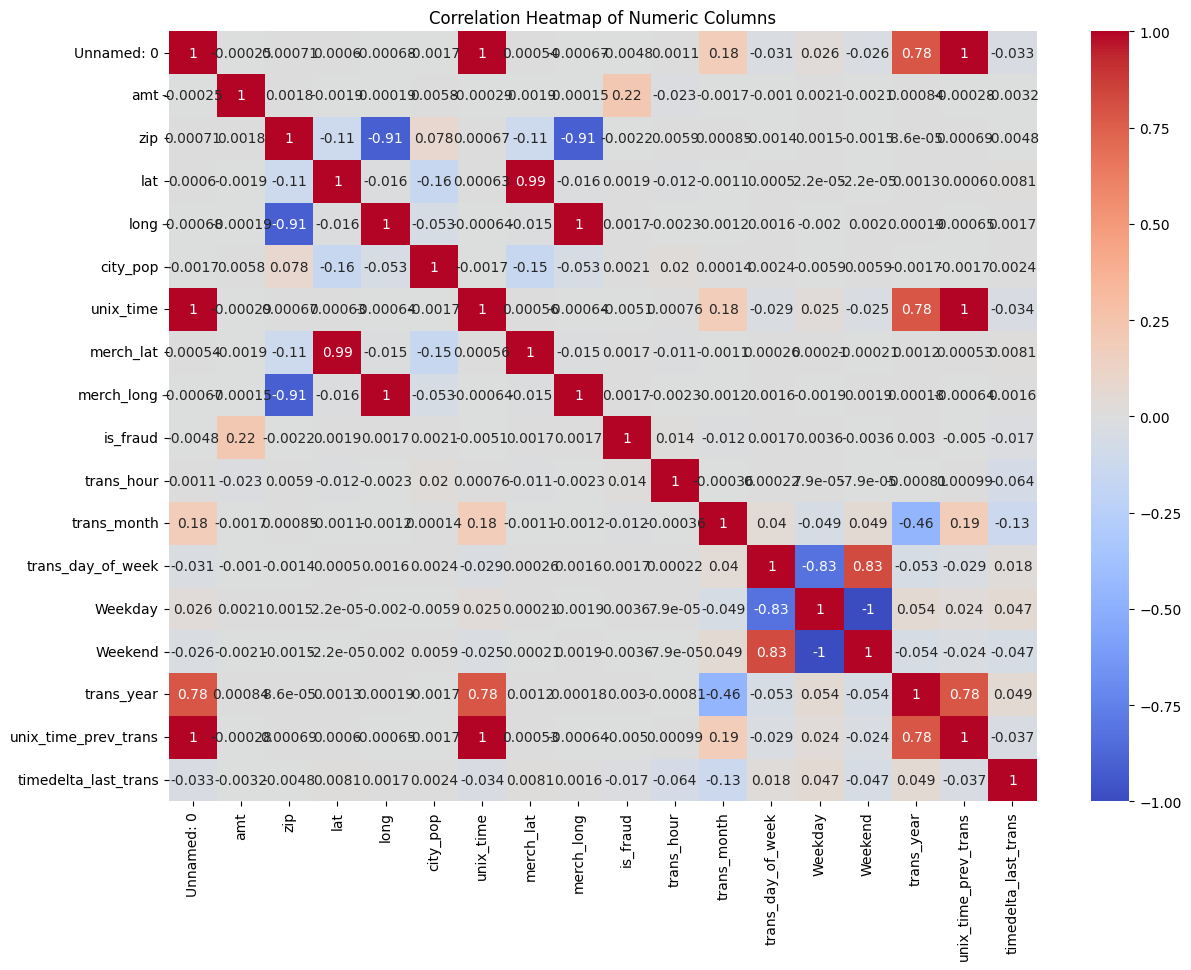

In [80]:
numeric_columns = data.select_dtypes(include='number')


# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Create heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()


## INFERENCE

From the heatmap, it can be observed that there are no strong positive or negative correlations between any pairs of variables in the dataset.Overall, the heatmap suggests that there are no highly correlated variables that need to be removed before building a machine learning model.

# EXPLORING AMT

In [81]:
#looking at distribution of amount
pd.concat(
    [data['amt'].describe(percentiles = [0.5,0.95,0.999]).reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
     data.loc[data['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'amt':'Non-Fraud Amt Distribution'}),
     data.loc[data['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})], axis=1)

,Row Type,Overall Amt Distribution,Non-Fraud Amt Distribution,Fraud Amt Distribution
0,count,1.296675e+06,1.289169e+06,7506.000000
1,mean,7.035104e+01,6.766711e+01,531.320092
2,std,1.603160e+02,1.540080e+02,390.560070
3,min,1.000000e+00,1.000000e+00,1.060000
4,50%,4.752000e+01,4.728000e+01,396.505000
5,95%,1.963100e+02,1.899000e+02,1083.985000
6,99.9%,1.499254e+03,1.503696e+03,1291.038400
7,max,2.894890e+04,2.894890e+04,1376.040000


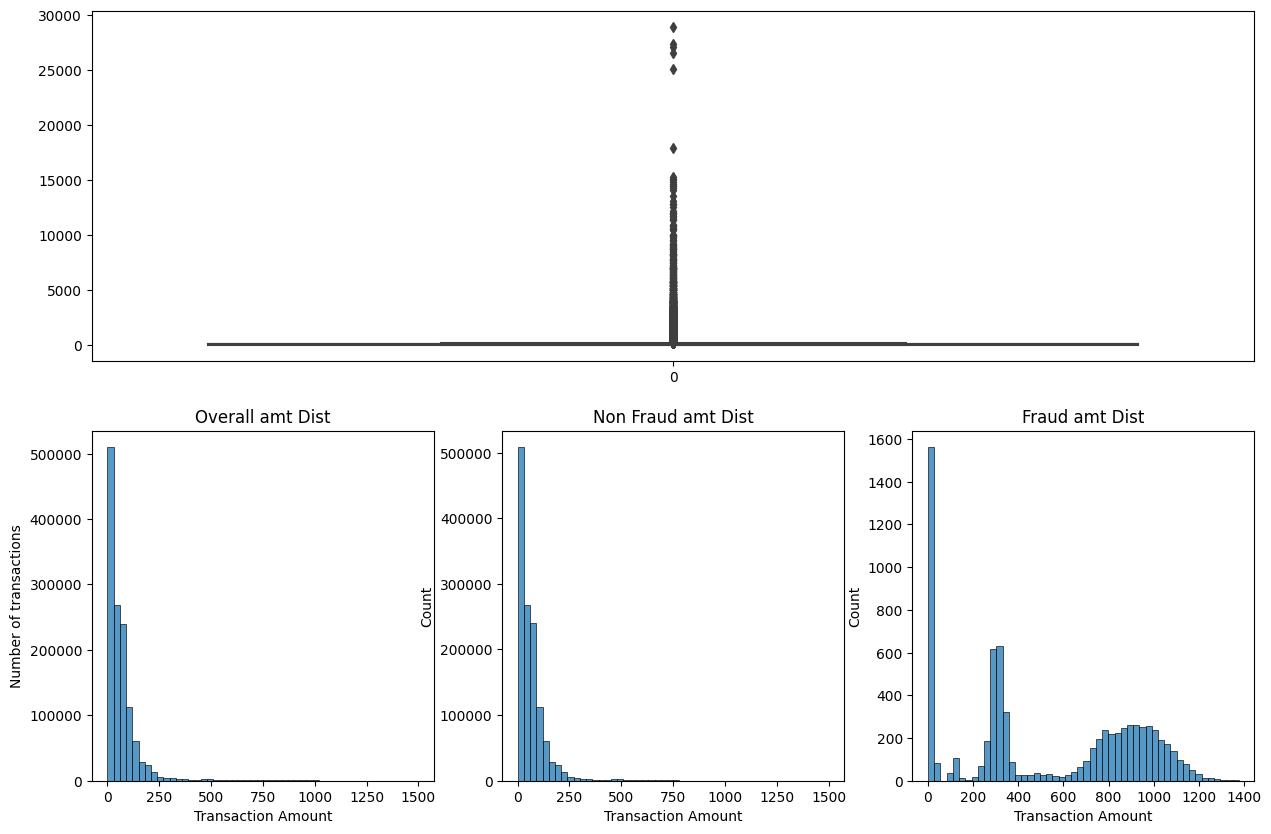

In [82]:
#plotting the above distributions
fig = plt.subplots(figsize=(15,10))

plots = []
#plotting the amt feature
#box plot
plots.append(sns.boxplot(data.amt, ax=plt.subplot(211)))

#distribution plots
plots.append(sns.histplot(data[data.amt <= 1500].amt, bins=50, ax=plt.subplot(234)))
plots.append(sns.histplot(data[(data.is_fraud==0) & (data.amt<=1500)].amt, bins=50, ax=plt.subplot(235)))
plots.append(sns.histplot(data[(data.is_fraud==1) & (data.amt<=1500)].amt, bins=50, ax=plt.subplot(236)))

#setting titles
plots[1].set_title('Overall amt Dist')
plots[2].set_title('Non Fraud amt Dist')
plots[3].set_title('Fraud amt Dist')

#setting x labels
plots[1].set_xlabel('Transaction Amount')
plots[2].set_xlabel('Transaction Amount')
plots[3].set_xlabel('Transaction Amount')

#setting y label
plots[1].set_ylabel('Number of transactions')

plt.show()

## Inference:


From the above plot, though the mean of the fraud amount seems to be more than that of the non fraud or the overall amount, it can be observed that the fraud amount is evenly distributed and often records low amount value as compared to the other distributions.
From this, it can be observed that the fraud amount transaction often happens in small amount, often aroung 200 and at times in the range of 200 to 400.
Therefore, the transactions in which small amount is involved can be monitored more closely in order to detect and prevent credit card fraud.

In [83]:
#year_month vs number of transactions
df_timeline01 = data.groupby(data['trans_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline01.columns = ['year_month','num_of_transactions','customers']
df_timeline01

,year_month,num_of_transactions,customers
0,1,104727,916
1,2,97657,919
2,3,143789,920
3,4,134970,919
4,5,146875,917
5,6,143811,910
6,7,86596,910
7,8,87359,911
8,9,70652,913
9,10,68758,912


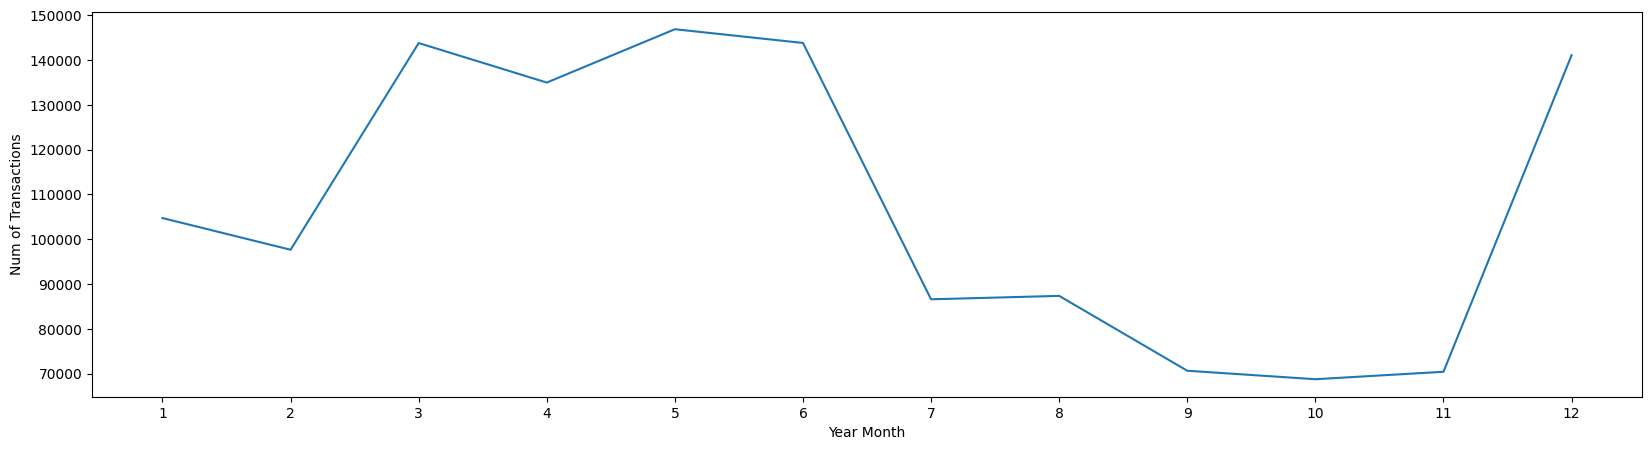

In [84]:
# plotting the above distributions

x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()

# STATE DATA


In [85]:
data.state.nunique()


51

In [86]:
#fetching states with high transaction frequecy
high_trans_states = data.state.value_counts().head(20).index.tolist()
print(high_trans_states)

['tx', 'ny', 'pa', 'ca', 'oh', 'mi', 'il', 'fl', 'al', 'mo', 'mn', 'ar', 'nc', 'wi', 'va', 'sc', 'ky', 'in', 'ia', 'ok']


In [87]:
100*data[data.state.isin(high_trans_states)].state.value_counts(normalize=True)


tx    10.991718
ny     9.673884
pa     9.250555
ca     6.529504
oh     5.384871
mi     5.347103
il     5.010896
fl     4.943585
al     4.748720
mo     4.449122
mn     3.674178
ar     3.606172
nc     3.506422
wi     3.402386
va     3.388715
sc     3.381764
ky     3.298929
in     3.195240
ia     3.126307
ok     3.089929
Name: state, dtype: float64

In [88]:
#constructing the state-transaction count distribution
df_state = data[['state','trans_num']].groupby(['state']).count().reset_index()
df_state.columns = ['state', 'state_count']

#creating the state-fraud distribution
df_fraud_state = data[['state', 'trans_num', 'is_fraud']].groupby(['state','is_fraud']).count().reset_index()
df_fraud_state.columns = ['state', 'is_fraud', 'Transaction count']

df_fraud_state = df_fraud_state.merge(df_state[['state', 'state_count']], how='inner', on='state')

df_fraud_state['Transaction percentage'] = (df_fraud_state['Transaction count']/df_fraud_state['state_count'])*100

#viewing the top 20 states with high fraudulent transactions
df_fraud_state[df_fraud_state['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False).head(20)

,state,is_fraud,Transaction count,state_count,Transaction percentage
16,de,1,9,9,100.000000
78,ri,1,15,550,2.727273
1,ak,1,36,2120,1.698113
66,nv,1,47,5607,0.838238
11,co,1,113,13880,0.814121
74,or,1,149,18597,0.801204
84,tn,1,140,17554,0.797539
58,ne,1,180,24168,0.744786
42,me,1,119,16505,0.720994
60,nh,1,59,8278,0.712733


In [89]:
print('States with more than 75% fraudulent transactions:\n')
fraudulent_states = df_fraud_state.loc[(df_fraud_state['is_fraud'] == 1) & (df_fraud_state['Transaction percentage'] >= 75), 'state']
print(fraudulent_states)


States with more than 75% fraudulent transactions:

16    de
Name: state, dtype: object


## INFERENCE (State feature):
The states 'PA', 'TX', 'NY' have the most amount of transactions noted in the given dataset.
The next highest in the list are 'FL', 'CA', 'MI', 'AL', 'OH' and 'IL'.
Majority of the transactions are happening in these states, and hence there is a high chance of fraudulent transaction happening in these states thourgh various methods including ATM and POS machine tamperings.
In the top 20 states with high transaction volumes, it can be noted that all states have a fraudulent transaction of about 0.5%.
'DE' is the most fraudulent state.

#  CATEGORY DATA

In [90]:
data.category.value_counts(normalize=True)


gas_transport     0.101536
grocery_pos       0.095350
home              0.094947
shopping_pos      0.089978
kids_pets         0.087173
shopping_net      0.075225
entertainment     0.072504
food_dining       0.070535
personal_care     0.069993
health_fitness    0.066230
misc_pos          0.061430
misc_net          0.048807
grocery_net       0.035053
travel            0.031239
Name: category, dtype: float64

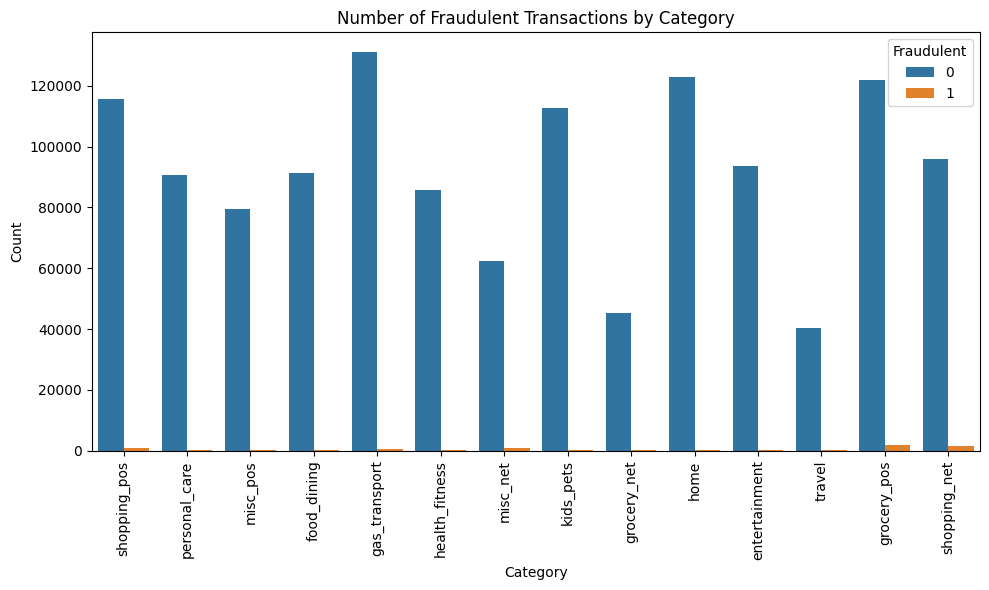

In [91]:
plt.figure(figsize=(10, 6))
plot = sns.countplot(data=data, x='category', hue='is_fraud')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Fraudulent Transactions by Category')
plt.legend(labels=['Fraud', 'Not Fraud'])
plt.legend(title='Fraudulent')
plt.tight_layout()
plt.show()


In [92]:
#constructing the category-transaction count distribution
df_category = data[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['category', 'category_count']

#creating the zip-fraud distribution
df_fraud_category = data[['category', 'trans_num', 'is_fraud']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['category', 'is_fraud', 'Transaction count']

df_fraud_category = df_fraud_category.merge(df_category[['category', 'category_count']], how='inner', on='category')

df_fraud_category['Transaction percentage'] = (df_fraud_category['Transaction count']/df_fraud_category['category_count'])*100

#viewing the top categories with high fraudulent transaction volumes
df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False)


,category,is_fraud,Transaction count,category_count,Transaction percentage
23,shopping_net,1,1713,97543,1.756149
17,misc_net,1,915,63287,1.445795
9,grocery_pos,1,1743,123638,1.409761
25,shopping_pos,1,843,116672,0.722538
5,gas_transport,1,618,131659,0.469394
19,misc_pos,1,250,79655,0.313853
7,grocery_net,1,134,45452,0.294817
27,travel,1,116,40507,0.286370
1,entertainment,1,233,94014,0.247835
21,personal_care,1,220,90758,0.242403


In [93]:
#categories with more than one percent fraudulent transactions
df_fraud_category.loc[(df_fraud_category.is_fraud == 1) & (df_fraud_category['Transaction percentage'] >= 1)].category

9      grocery_pos
17        misc_net
23    shopping_net
Name: category, dtype: object

## INFERENCE ('category' feature):
from the above plots and dataframes created, it can be observed that about 3 categories have more than 1% fraudulent transactions involved. These are - grocery_pos, misc_net, shopping_net.
out these, the shopping_net category has the most number of fraudulent transactions.

# MERCHANT DATA

In [94]:
data.merchant.nunique()

693

In [95]:
high_trans_merchants = data.merchant.value_counts().head(20).index.tolist()
high_trans_merchants

['3iw9pgllv1ogoax',
 '0mkrnlrsm2wcq2f',
 '4ydgk75xwalf3v',
 'bmisoa1crlnp',
 '3xpk70yxcg9ae',
 'fxg5qzb0xptfms4cf',
 'e6w2vldshoispjzkg7ih',
 '3epwedt6fjsbn',
 'dntx5tinqm0kaulsollqsg1',
 'kznlniehkl4zl7g8jllvcahfijt',
 'nmg66hzgnburjdyc1oc',
 '0hfrwodottmmuxyv7lnvskt4lkj',
 '7elue9jhyrhz1ccrntapy',
 'xeabpn4maxpnq',
 'ghgooriaee4bzp8qgydgqjz8lkbqlrv',
 'mkrzadmmmyziqepx7m',
 'wtyi2j30cg8oted8aaih',
 '4dxditibuwww3mm',
 'wgabdyy1c6enl',
 'edlye473fx7tm2a6lpdzqmws7dg9e505x90lzo']

In [96]:
#constructing the merchant-transaction count distribution
df_merchant = data[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['merchant', 'merchant_count']

#creating the zip-fraud distribution
df_fraud_merchant = data[['merchant', 'trans_num', 'is_fraud']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['merchant', 'is_fraud', 'Transaction count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['merchant', 'merchant_count']], how='inner', on='merchant')

df_fraud_merchant['Transaction percentage'] = (df_fraud_merchant['Transaction count']/df_fraud_merchant['merchant_count'])*100

#viewing the top 20 merchant with high fraudulent transaction volumes
df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False).head(20)

,merchant,is_fraud,Transaction count,merchant_count,Transaction percentage
729,ldvqzbxg3vw9lmtb,1,48,1866,2.572347
914,po3vtu0jxbydtazon6oyoofdccci,1,33,1300,2.538462
25,0vc5j18uvya7lm0dgqt6,1,41,1838,2.230686
177,7wlrjjtu4zcfz,1,26,1176,2.210884
835,nkikuj6xcjyr8dp,1,42,1943,2.161606
440,eixebumna0pdpq3,1,43,1996,2.154309
843,nts7gqcgfgp3,1,42,1953,2.150538
625,iul9hmsfl8kjvg3tvqcege1o96tzni,1,41,1968,2.083333
352,ckvw21lpr2fxqsdvv74,1,38,1908,1.991614
175,7tkaaiz8yksxmnvxapbcs8fjsviup87,1,39,1969,1.980701


In [97]:
#number of merchants with more than one percent fraudulent transactions
len(df_fraud_merchant.loc[(df_fraud_merchant.is_fraud == 1) & (df_fraud_merchant['Transaction percentage'] >= 1)].merchant)

145

## INFERENCE 


from the above plots and dataframes created, it can be observed that aboout 140 merchants have more than 1% transactions
associated with them as fraudulent transactions.

#  GENDER DATA

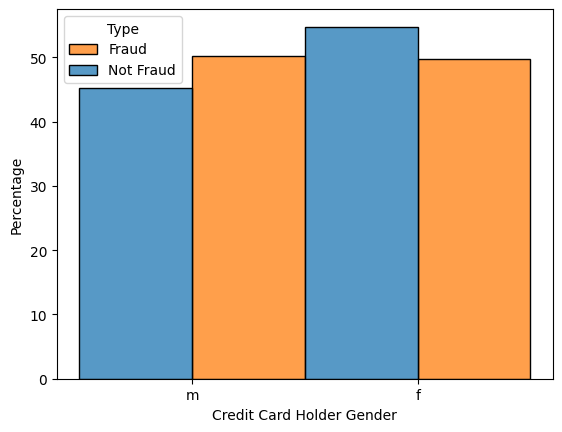

In [98]:
#Relation between Gender and Fraud
ax=sns.histplot(x='gender',data=data, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [99]:
#creating the 'gender' distributed dataframe
df_gender = data[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender', 'gender_count']

#creating gender-fraud distribution
df_fraud_gender = data[['gender','trans_num', 'is_fraud']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender', 'is_fraud', 'Transaction Count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender', 'gender_count']], how='inner', on='Gender')

df_fraud_gender['Transaction percentage'] = (df_fraud_gender['Transaction Count']/df_fraud_gender['gender_count'])*100

df_fraud_gender

,Gender,is_fraud,Transaction Count,gender_count,Transaction percentage
0,f,0,706128,709863,99.473842
1,f,1,3735,709863,0.526158
2,m,0,583041,586812,99.357375
3,m,1,3771,586812,0.642625


## INFERENCE
From the above visualization it can be observed that women contribute the most to the amount of the transaction frequencies.
Although women do participate in fraud, the amount of women involved in fraud with respect to the number of transactions 
involving women is 0.52% whereas the same for men is about 0.64%.

In [100]:
data.to_csv('New_data.csv', index=False) 